Training started
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 151, 128)          72704     
                                                                 
 lstm_4 (LSTM)               (None, 64)                49408     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                                 
Total params: 126,402
Trainable params: 126,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
317/317 [===========

Epoch 26/30
317/317 [==============================] - ETA: 0s - loss: 0.3005 - accuracy: 0.8615
Epoch 26: saving model to best_model_lang_detect_lstm.h5
317/317 [==============================] - 60s 191ms/step - loss: 0.3005 - accuracy: 0.8615 - val_loss: 0.3405 - val_accuracy: 0.8383
Epoch 27/30
317/317 [==============================] - ETA: 0s - loss: 0.3239 - accuracy: 0.8497
Epoch 27: saving model to best_model_lang_detect_lstm.h5
317/317 [==============================] - 61s 193ms/step - loss: 0.3239 - accuracy: 0.8497 - val_loss: 0.3607 - val_accuracy: 0.8379
Epoch 28/30
317/317 [==============================] - ETA: 0s - loss: 0.2894 - accuracy: 0.8637
Epoch 28: saving model to best_model_lang_detect_lstm.h5
317/317 [==============================] - 61s 191ms/step - loss: 0.2894 - accuracy: 0.8637 - val_loss: 0.3335 - val_accuracy: 0.8434
Epoch 29/30
317/317 [==============================] - ETA: 0s - loss: 0.3534 - accuracy: 0.8349
Epoch 29: saving model to best_model_la

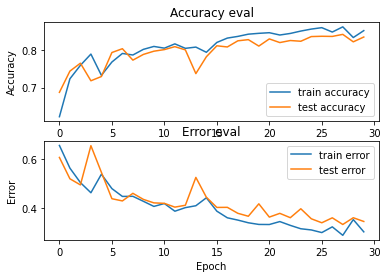

132/132 - 10s - loss: 0.3323 - accuracy: 0.8475 - 10s/epoch - 74ms/step

Test accuracy: 0.8475378751754761
1/1 [==============================] - 2s 2s/step
Target: 0, Predicted label: [1]


In [48]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "lang_features.json"


def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model_cnn(input_shape):
    """Generates CNN model

    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

def build_model_lstm(input_shape):
    """Generates lstm model

    :param input_shape (tuple): Shape of input set
    :return model: lstm model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Dense(2, activation='softmax'))

    return model

def build_model_gru(input_shape):
    """Generates gru model

    :param input_shape (tuple): Shape of input set
    :return model: gru model
    """

    # build network topology
    model2 = keras.Sequential()

    model2.add(keras.layers.GRU(128, input_shape=input_shape, return_sequences=True))
    model2.add(keras.layers.GRU(64))

          # dense layer
    model2.add(keras.layers.Dense(64, activation='relu'))
    model2.add(keras.layers.Dropout(0.3))

          # output layer
    model2.add(keras.layers.Dense(2, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
    print('Training started')
    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    input_shape_1=(X_train.shape[1], X_train.shape[2])
    model = build_model_lstm(input_shape_1)
    callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_lang_detect_lstm.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30,callbacks=[callback])

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[1000]
    y_to_predict = y_test[1000]

    # predict sample
    predict(model, X_to_predict, y_to_predict)



In [50]:
import json
import os
import math
import librosa
file_path = r'C:\Users\naray\Python_for_aisp\Data\Telugu\tef_01033_00010179612.wav'
signal, sample_rate = librosa.load(file_path, sr=22050)
SAMPLES_PER_TRACK=22050*7
for d in range(1):
    samples_per_segment=int(SAMPLES_PER_TRACK / 2)
    start = samples_per_segment * d
    finish = int(SAMPLES_PER_TRACK / 2)

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=13, n_fft=2048, hop_length=512)
    mfcc = mfcc.T
print(mfcc.shape)

C:\Users\naray\AppData\Local\Temp\ipykernel_21460\2274897515.py:14: FutureWarning: Pass y=[-0.00010947 -0.0001653  -0.00014516 ...  0.          0.
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=13, n_fft=2048, hop_length=512)


(151, 13)


In [55]:
model = build_model_gru(input_shape_1)
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [56]:
model.load_weights('best_model_lang_detect_lstm.h5')

In [57]:
for i in range(0,100,2):
    X_to_predict = X_test[i]
    y_to_predict = y_test[i]

    # predict sample
    predict(model, X_to_predict, y_to_predict)
    

1/1 [==============================] - 2s 2s/step
Target: 1, Predicted label: [1]
1/1 [==============================] - 0s 43ms/step
Target: 1, Predicted label: [1]
1/1 [==============================] - 0s 43ms/step
Target: 0, Predicted label: [0]
1/1 [==============================] - 0s 43ms/step
Target: 1, Predicted label: [1]
1/1 [==============================] - 0s 45ms/step
Target: 1, Predicted label: [0]
1/1 [==============================] - 0s 52ms/step
Target: 1, Predicted label: [1]
1/1 [==============================] - 0s 45ms/step
Target: 0, Predicted label: [0]
1/1 [==============================] - 0s 43ms/step
Target: 0, Predicted label: [0]
1/1 [==============================] - 0s 44ms/step
Target: 0, Predicted label: [0]
1/1 [==============================] - 0s 42ms/step
Target: 1, Predicted label: [1]
1/1 [==============================] - 0s 45ms/step
Target: 1, Predicted label: [1]
1/1 [==============================] - 0s 43ms/step
Target: 1, Predicted label

In [58]:
y=mfcc.reshape(151,13,1)
X = y[np.newaxis, ...]
prediction=model.predict(X)
predicted_index = np.argmax(prediction, axis=1)
print('predicted index :',predicted_index)

1/1 [==============================] - 0s 45ms/step
predicted index : [1]
